In [448]:
import numpy as np 
import pandas as pd 
import os


In [449]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

1.數據分析
查看train中的數據內容

In [450]:

train = pd.read_csv('./train.csv')

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002392391E208>,
      dtype=object)

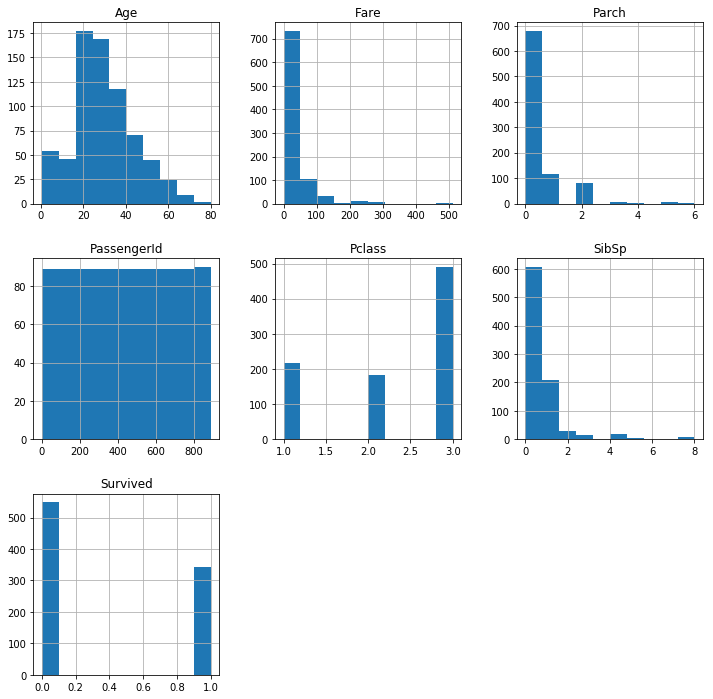

In [451]:

train.hist(figsize = (12,12))

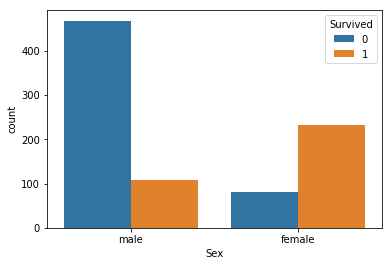

In [452]:
#性別與生或死間的關係
sns.countplot('Sex' , hue = 'Survived',data = train)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


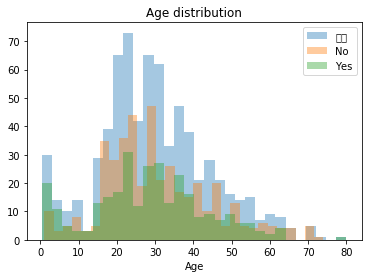

In [453]:
#總人數的長條圖
sns.distplot(train['Age'].dropna(), kde=False, bins=30 ,label='全體')
#死亡人數長條圖
sns.distplot(train[train['Survived'] == 0].Age.dropna(), kde=False, bins=30,label='No')
#倖存者長條圖
sns.distplot(train[train['Survived'] == 1].Age.dropna(), kde=False, bins=30,label='Yes')
#年齡分布圖
plt.title('Age distribution') 
plt.legend() 

2.前處理
  處理loss值以便機器學習的預測

In [454]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [455]:
#處理loss(中位數)

#train['Fare'] = train['Fare'].fillna(train['Fare'].median())
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna('S') 


train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
將文字訊息轉換為數字，例如男性與女性分別轉換成1與0

In [456]:
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)
train['Embarked'] = train['Embarked'].map( {'S': 0 , 'C':1 , 'Q':2}).astype(int)


#df = df.drop(['Cabin','Name','PassengerId','Ticket'],axis =1)

In [457]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


3.提取特徵

In [458]:
target = train["Survived"].values
#explain = train[["Pclass", "Sex", "Age", "Fare", "Embarked"]].values
explain = train[["Sex", "Age","Embarked"]].values

In [ ]:
4.評估、創建模型

In [459]:
from sklearn.model_selection import  train_test_split

train_X = explain
train_y = target
(train_X , test_X , train_y , test_y) = train_test_split(train_X, train_y , test_size = 0.0155 , random_state = 3)

創建模型:
DecisionTree分階段劃分數據並輸出結果

In [460]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 0)

clf = clf.fit(train_X , train_y)

In [468]:
print('accuracy:%.5f'%clf.score(test_X, test_y))
#print(clf.score(test_X, test_y))
# print(round(clf.score(test_X, test_y) * 100, 2))

accuracy:0.85714


5.預測
用train.csv來建立模型 
並以test.csv中的數據來檢測

In [464]:
#前處理test.csv中的數據 
test = pd.read_csv('./test.csv')
test.head()

passsengerid = test['PassengerId']
test.isnull().sum()
#test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Embarked'] = test['Embarked'].fillna('S')


test['Sex'] = test['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test['Embarked'] = test['Embarked'].map( {'S': 0 , 'C':1 , 'Q':2}).astype(int)
#使用以下變數作為模型的參數
explain_test = test[[ "Sex", "Age","Embarked"]].values
#explain_test = test[["Pclass", "Sex", "Age", "Fare", "Embarked"]].values

In [465]:
predictions = clf.predict(explain_test)

In [466]:
predictions

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [467]:
#將test.csv預測的結果輸出到CSV檔中
submission = pd.DataFrame({'PassengerId':passsengerid, 'Survived':predictions})
submission.to_csv('submission.csv' , index = False)